In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *
%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "ISA"
tool_suffix = "ISA"
n_runs = 10

#parameters = (("no_seeds",[0.05,0.1,0.15,0.2,0.25,0.3, 0.35, 0.4,0.45 ,0.5]))
parameters = [ ("no_seeds", range(10,110,10))]

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/J/img"
tsv_outdir = out_dir + "/J/"

In [4]:
true_bic_fname = true_bic_fname_prefix+str(20)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

bic_file_path = '../simulated_datasets/results/ISA/no_seeds=10/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.ISA.biclust_results.txt'
runs = parse_biclust(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )
    

0 0.016970119127881225
1 0.017341381628395616
2 0.01764795131234069
3 0.017800479763283684
4 0.01808677839131047
5 0.017653611502194154
6 0.015372433796336874
7 0.01954447523669385
8 0.018010793384964724
9 0.018772452738417458


In [5]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 10
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 2000
Non-zero runs: 2000


In [6]:
parameters

[('no_seeds', [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])]

Total combinations: 10
Total combinations: 10
[ 10  20  30  40  50  60  70  80  90 100]
Top 20 paramter combinations


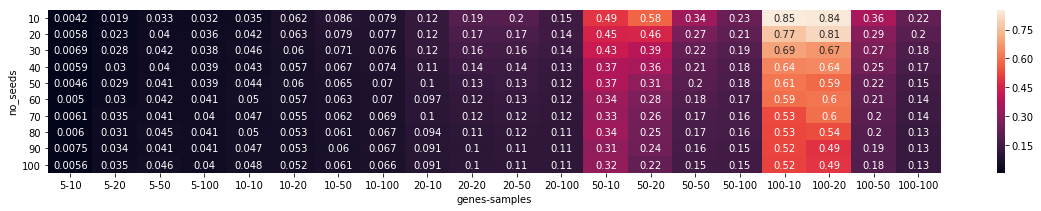

In [7]:
params = ["no_seeds"]
plot_file = img_outdir+"/" + tool_suffix+".J_rel.heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".J_rel.heatmap.tsv"

heatmap = plot_performance_heatmap(results,params,top=20,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [8]:
params

['no_seeds']

In [9]:
default_params = ([100])

In [11]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 2000 runs considered

with Optimal parameters (Relevance --> max):
	no_seeds=10;
	Max. avg. Relevance: 0.246 ± 0.257
	Max. avg. Recovery: 0.418 ± 0.305
	Max. avg. n_biclusters: 35.285 ± 17.559
With Default parameters:
	no_seeds=100;
	avg. Relevance: 0.147 ± 0.141
	avg. Recovery: 0.586 ± 0.356
	avg. n_biclusters: 203.68 ± 137.445


Relevance                                      Recovery            \
              mean       std count       max       min      mean       std   
no_seeds                                                                     
10        0.245882  0.256698   200  0.983787  0.001942  0.417519  0.304930   
20        0.221645  0.229505   200  0.920989  0.001509  0.521733  0.351507   
30        0.199346  0.197810   200  0.788612  0.002180  0.555737  0.356225   
40        0.184685  0.183216   200  0.777829  0.002707  0.568799  0.359668   
50        0.173212  0.170291   200  0.668865  0.001629  0.575639  0.361210   
60        0.166802  0.167244   200  0.703062  0.002043  0.580817  0.359650   
70        0.160183  0.157719   200  0.742296  0.002577  0.581550  0.358624   
80        0.154519  0.149517   200  0.617226  0.002651  0.583802  0.358256   
90        0.147814  0.140486   200  0.599979  0.004074  0.584744  0.356977   
100       0.146922  0.141118   200  0.615435  0.003473  0.585827  0.356479   

                                  n_biclusters                             \
         count      max       min         mean         std count  max min   
no_seeds                                                                    
10         200  0.98603  0.001950       35.285   17.559197   200   81   6   
20         200  0.98603  0.002425       58.850   32.640843   200  131   8   
30         200  0.98603  0.003623       79.800   46.217532   200  164   7   
40         200  0.98603  0.003156       98.840   60.155196   200  224   5   
50         200  0.98603  0.002687      119.315   73.464898   200  267  14   
60         200  0.98603  0.002891      134.930   87.886148   200  309  13   
70         200  0.98603  0.002409      150.945   98.031643   200  330  12   
80         200  0.98603  0.003950      169.045  112.104416   200  384  15   
90         200  0.98603  0.005186      189.095  127.506847   200  452  12   
100        200  0.98603  0.004700      203.680  137.445385   200  464  16   

         Relevance  
            n_runs  
no_seeds            
10            10.0  
20            10.0  
30            10.0  
40            10.0  
50            10.0  
60            10.0  
70            10.0  
80            10.0  
90            10.0  
100           10.0